In [1]:
## R code 13.1
a <- 3.5            # average morning wait time
b <- (-1)           # average difference afternoon wait time
sigma_a <- 1        # std dev in intercepts
sigma_b <- 0.5      # std dev in slopes
rho <- (-0.7)       # correlation between intercepts and slopes

In [2]:
## R code 13.2
Mu <- c( a , b )

In [3]:
## R code 13.3
cov_ab <- sigma_a*sigma_b*rho
Sigma <- matrix( c(sigma_a^2,cov_ab,cov_ab,sigma_b^2) , ncol=2 )

In [4]:
## R code 13.4
matrix( c(1,2,3,4) , nrow=2 , ncol=2 )

1,3
2,4


In [5]:
## R code 13.5
sigmas <- c(sigma_a,sigma_b) # standard deviations
Rho <- matrix( c(1,rho,rho,1) , nrow=2 ) # correlation matrix

# now matrix multiply to get covariance matrix
Sigma <- diag(sigmas) %*% Rho %*% diag(sigmas)

In [6]:
## R code 13.6
N_cafes <- 20

In [7]:
## R code 13.7
library(MASS)
set.seed(5) # used to replicate example
vary_effects <- mvrnorm( N_cafes , Mu , Sigma )

In [8]:
## R code 13.8
a_cafe <- vary_effects[,1]
b_cafe <- vary_effects[,2]

ERROR: Error in plot.xy(xy, type, ...): object 'rangi2' not found


ERROR: Error in library(ellipse): there is no package called ‘ellipse’


ERROR: Error in lines(ellipse(Sigma, centre = Mu, level = l), col = col.alpha("black", : could not find function "ellipse"


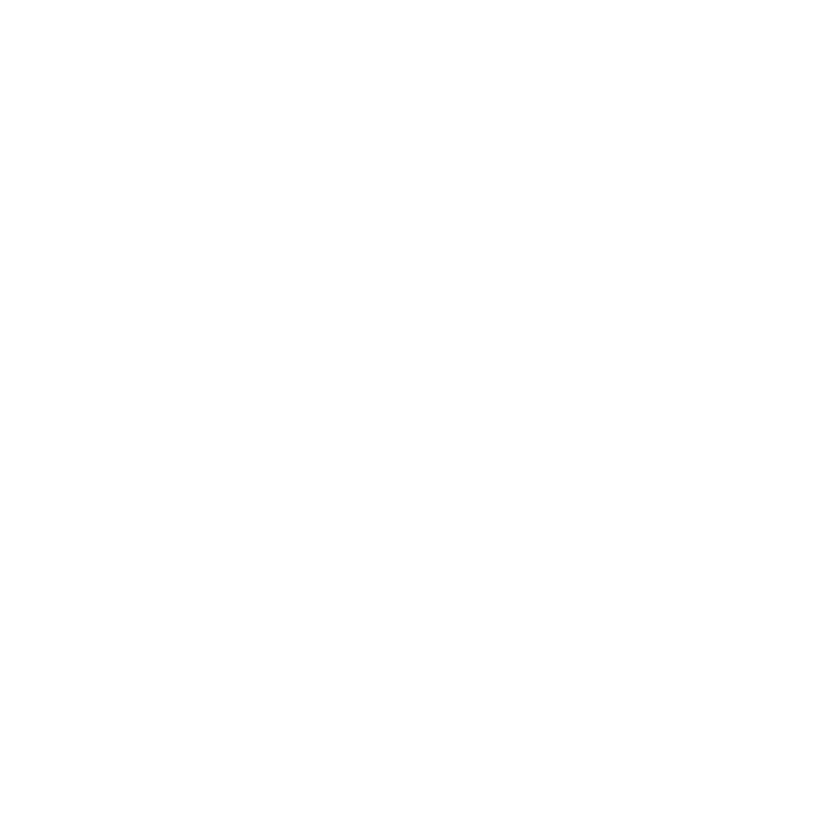

In [9]:
## R code 13.9
plot( a_cafe , b_cafe , col=rangi2 ,
    xlab="intercepts (a_cafe)" , ylab="slopes (b_cafe)" )

# overlay population distribution
library(ellipse)
for ( l in c(0.1,0.3,0.5,0.8,0.99) )
    lines(ellipse(Sigma,centre=Mu,level=l),col=col.alpha("black",0.2))

In [10]:
## R code 13.10
N_visits <- 10
afternoon <- rep(0:1,N_visits*N_cafes/2)
cafe_id <- rep( 1:N_cafes , each=N_visits )
mu <- a_cafe[cafe_id] + b_cafe[cafe_id]*afternoon
sigma <- 0.5  # std dev within cafes
wait <- rnorm( N_visits*N_cafes , mu , sigma )
d <- data.frame( cafe=cafe_id , afternoon=afternoon , wait=wait )

In [11]:
## R code 13.11
R <- rlkjcorr( 1e4 , K=2 , eta=2 )
dens( R[,1,2] , xlab="correlation" )

ERROR: Error in eval(expr, envir, enclos): could not find function "rlkjcorr"


ERROR: Error in eval(expr, envir, enclos): could not find function "dens"


In [12]:
## R code 13.12
m13.1 <- map2stan(
    alist(
        wait ~ dnorm( mu , sigma ),
        mu <- a_cafe[cafe] + b_cafe[cafe]*afternoon,
        c(a_cafe,b_cafe)[cafe] ~ dmvnorm2(c(a,b),sigma_cafe,Rho),
        a ~ dnorm(0,10),
        b ~ dnorm(0,10),
        sigma_cafe ~ dcauchy(0,2),
        sigma ~ dcauchy(0,2),
        Rho ~ dlkjcorr(2)
    ) ,
    data=d ,
    iter=5000 , warmup=2000 , chains=2 )

ERROR: Error in eval(expr, envir, enclos): could not find function "map2stan"


In [13]:
## R code 13.13
post <- extract.samples(m13.1)
dens( post$Rho[,1,2] )

ERROR: Error in eval(expr, envir, enclos): could not find function "extract.samples"


ERROR: Error in eval(expr, envir, enclos): could not find function "dens"


ERROR: Error in eval(expr, envir, enclos): could not find function "extract.samples"


ERROR: Error in apply(post$a_cafe, 2, mean): object 'post' not found


ERROR: Error in apply(post$b_cafe, 2, mean): object 'post' not found


ERROR: Error in plot.xy(xy, type, ...): object 'rangi2' not found


ERROR: Error in points(a2, b2, pch = 1): object 'a2' not found


ERROR: Error in lines(c(a1[i], a2[i]), c(b1[i], b2[i])): object 'a2' not found


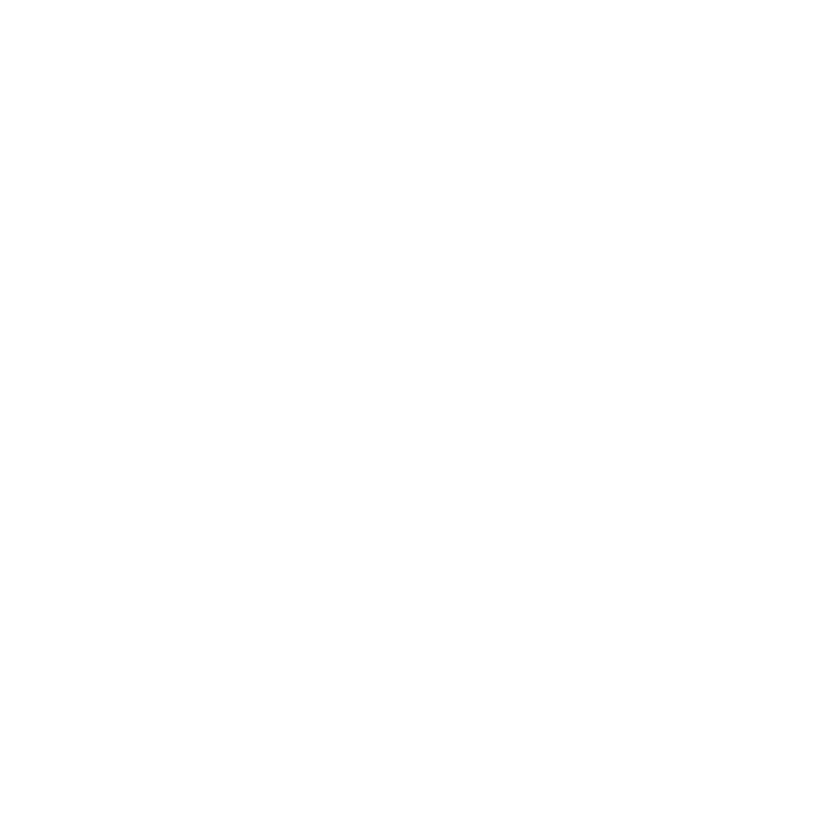

In [14]:
## R code 13.14
# compute unpooled estimates directly from data
a1 <- sapply( 1:N_cafes ,
        function(i) mean(wait[cafe_id==i & afternoon==0]) )
b1 <- sapply( 1:N_cafes ,
        function(i) mean(wait[cafe_id==i & afternoon==1]) ) - a1

# extract posterior means of partially pooled estimates
post <- extract.samples(m13.1)
a2 <- apply( post$a_cafe , 2 , mean )
b2 <- apply( post$b_cafe , 2 , mean )

# plot both and connect with lines
plot( a1 , b1 , xlab="intercept" , ylab="slope" ,
    pch=16 , col=rangi2 , ylim=c( min(b1)-0.1 , max(b1)+0.1 ) ,
    xlim=c( min(a1)-0.1 , max(a1)+0.1 ) )
points( a2 , b2 , pch=1 )
for ( i in 1:N_cafes ) lines( c(a1[i],a2[i]) , c(b1[i],b2[i]) )

In [15]:
## R code 13.15
# compute posterior mean bivariate Gaussian
Mu_est <- c( mean(post$a) , mean(post$b) )
rho_est <- mean( post$Rho[,1,2] )
sa_est <- mean( post$sigma_cafe[,1] )
sb_est <- mean( post$sigma_cafe[,2] )
cov_ab <- sa_est*sb_est*rho_est
Sigma_est <- matrix( c(sa_est^2,cov_ab,cov_ab,sb_est^2) , ncol=2 )

# draw contours
library(ellipse)
for ( l in c(0.1,0.3,0.5,0.8,0.99) )
    lines(ellipse(Sigma_est,centre=Mu_est,level=l),
        col=col.alpha("black",0.2))

ERROR: Error in mean(post$a): object 'post' not found


ERROR: Error in mean(post$Rho[, 1, 2]): object 'post' not found


ERROR: Error in mean(post$sigma_cafe[, 1]): object 'post' not found


ERROR: Error in mean(post$sigma_cafe[, 2]): object 'post' not found


ERROR: Error in eval(expr, envir, enclos): object 'sa_est' not found


ERROR: Error in matrix(c(sa_est^2, cov_ab, cov_ab, sb_est^2), ncol = 2): object 'sa_est' not found


ERROR: Error in library(ellipse): there is no package called ‘ellipse’


ERROR: Error in lines(ellipse(Sigma_est, centre = Mu_est, level = l), col = col.alpha("black", : could not find function "ellipse"


In [16]:
## R code 13.16
# convert varying effects to waiting times
wait_morning_1 <- (a1)
wait_afternoon_1 <- (a1 + b1)
wait_morning_2 <- (a2)
wait_afternoon_2 <- (a2 + b2)

ERROR: Error in eval(expr, envir, enclos): object 'a2' not found


ERROR: Error in eval(expr, envir, enclos): object 'a2' not found


In [17]:
## R code 13.17
library(rethinking)
data(UCBadmit)
d <- UCBadmit
d$male <- ifelse( d$applicant.gender=="male" , 1 , 0 )
d$dept_id <- coerce_index( d$dept )

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


In [18]:
## R code 13.18
m13.2 <- map2stan(
    alist(
        admit ~ dbinom( applications , p ),
        logit(p) <- a_dept[dept_id] + bm*male,
        a_dept[dept_id] ~ dnorm( a , sigma_dept ),
        a ~ dnorm(0,10),
        bm ~ dnorm(0,1),
        sigma_dept ~ dcauchy(0,2)
    ) ,
    data=d , warmup=500 , iter=4500 , chains=3 )
precis( m13.2 , depth=2 ) # depth=2 to display vector parameters

Will attempt to remove dots internally.
Warning message:
In FUN(X[[i]], ...): data with name dept is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name applicant_gender is not numeric and not used


SAMPLING FOR MODEL 'admit ~ dbinom(applications, p)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 4500 [  0%]  (Warmup)
Chain 1, Iteration:  450 / 4500 [ 10%]  (Warmup)
Chain 1, Iteration:  501 / 4500 [ 11%]  (Sampling)
Chain 1, Iteration:  950 / 4500 [ 21%]  (Sampling)
Chain 1, Iteration: 1400 / 4500 [ 31%]  (Sampling)
Chain 1, Iteration: 1850 / 4500 [ 41%]  (Sampling)
Chain 1, Iteration: 2300 / 4500 [ 51%]  (Sampling)
Chain 1, Iteration: 2750 / 4500 [ 61%]  (Sampling)
Chain 1, Iteration: 3200 / 4500 [ 71%]  (Sampling)
Chain 1, Iteration: 3650 / 4500 [ 81%]  (Sampling)
Chain 1, Iteration: 4100 / 4500 [ 91%]  (Sampling)
Chain 1, Iteration: 4500 / 4500 [100%]  (Sampling)# 
#  Elapsed Time: 0.28599 seconds (Warm-up)
#                1.68076 seconds (Sampling)
#                1.96675 seconds (Total)
# 

SAMPLING FOR MODEL 'admit ~ dbinom(applications, p)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 4500 [  0%]  (Warmup)
Chain 2, Iteration:  450 / 4500 [ 10%]  (Warmup)
Chain 2, Iteration:  

Warning message:
In FUN(X[[i]], ...): data with name dept is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name applicant_gender is not numeric and not used


SAMPLING FOR MODEL 'admit ~ dbinom(applications, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 2e-06 seconds (Warm-up)
#                0.000147 seconds (Sampling)
#                0.000149 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 12000 / 12000 ]


Aggregated binomial counts detected. Splitting to 0/1 outcome for WAIC calculation.
Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

            Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a_dept[1]   0.68   0.10       0.52       0.83  5359    1
a_dept[2]   0.63   0.12       0.44       0.81  5377    1
a_dept[3]  -0.58   0.07      -0.70      -0.47  8174    1
a_dept[4]  -0.62   0.09      -0.75      -0.48  6355    1
a_dept[5]  -1.06   0.10      -1.21      -0.90  8985    1
a_dept[6]  -2.61   0.16      -2.87      -2.36  9588    1
a          -0.60   0.67      -1.59       0.41  3863    1
bm         -0.10   0.08      -0.22       0.04  3934    1
sigma_dept  1.49   0.61       0.72       2.22  3828    1

In [19]:
## R code 13.19
m13.3 <- map2stan(
    alist(
        admit ~ dbinom( applications , p ),
        logit(p) <- a_dept[dept_id] +
                    bm_dept[dept_id]*male,
        c(a_dept,bm_dept)[dept_id] ~ dmvnorm2( c(a,bm) , sigma_dept , Rho ),
        a ~ dnorm(0,10),
        bm ~ dnorm(0,1),
        sigma_dept ~ dcauchy(0,2),
        Rho ~ dlkjcorr(2)
    ) ,
    data=d , warmup=1000 , iter=5000 , chains=4 , cores=3 )

Will attempt to remove dots internally.
Warning message:
In FUN(X[[i]], ...): data with name dept is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name applicant_gender is not numeric and not usedWarning message:
: There were 6 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help.Warning message:
: Examine the pairs() plot to diagnose sampling problems
Warning message:
In FUN(X[[i]], ...): data with name dept is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name applicant_gender is not numeric and not used


SAMPLING FOR MODEL 'admit ~ dbinom(applications, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.000799 seconds (Sampling)
#                0.000802 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 16000 / 16000 ]


Aggregated binomial counts detected. Splitting to 0/1 outcome for WAIC calculation.
Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In map2stan(alist(admit ~ dbinom(applications, p), logit(p) <- a_dept[dept_id] + : There were 6 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

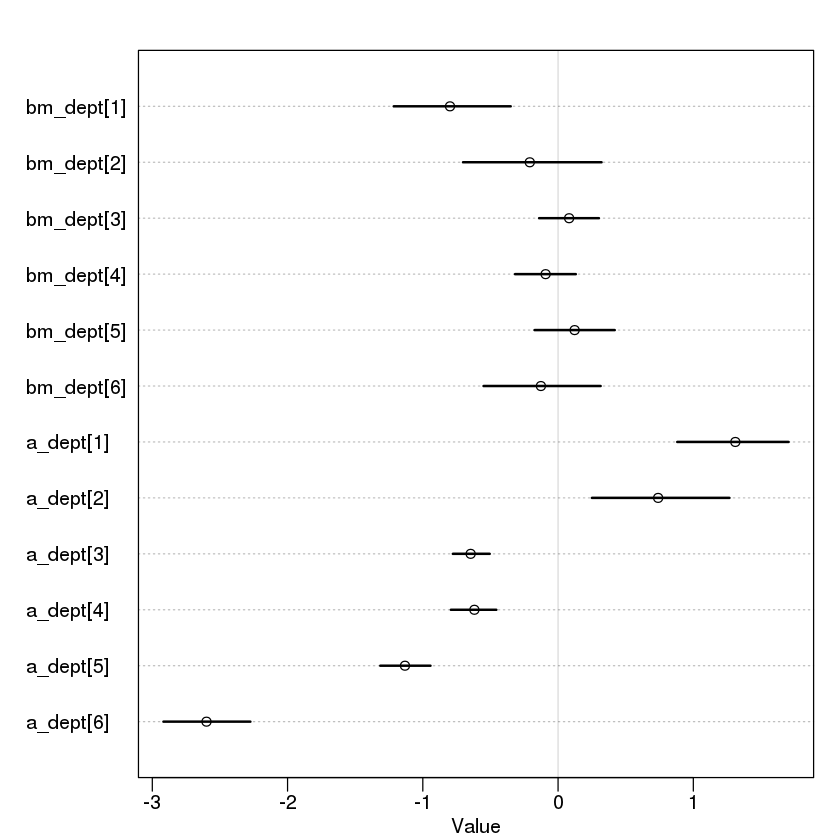

In [20]:
## R code 13.20
plot( precis(m13.3,pars=c("a_dept","bm_dept"),depth=2) )

In [21]:
## R code 13.21
m13.4 <- map2stan(
    alist(
        admit ~ dbinom( applications , p ),
        logit(p) <- a_dept[dept_id],
        a_dept[dept_id] ~ dnorm( a , sigma_dept ),
        a ~ dnorm(0,10),
        sigma_dept ~ dcauchy(0,2)
    ) ,
    data=d , warmup=500 , iter=4500 , chains=3 )

compare( m13.2 , m13.3 , m13.4 )

Will attempt to remove dots internally.
Warning message:
In FUN(X[[i]], ...): data with name dept is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name applicant_gender is not numeric and not used


SAMPLING FOR MODEL 'admit ~ dbinom(applications, p)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 4500 [  0%]  (Warmup)
Chain 1, Iteration:  450 / 4500 [ 10%]  (Warmup)
Chain 1, Iteration:  501 / 4500 [ 11%]  (Sampling)
Chain 1, Iteration:  950 / 4500 [ 21%]  (Sampling)
Chain 1, Iteration: 1400 / 4500 [ 31%]  (Sampling)
Chain 1, Iteration: 1850 / 4500 [ 41%]  (Sampling)
Chain 1, Iteration: 2300 / 4500 [ 51%]  (Sampling)
Chain 1, Iteration: 2750 / 4500 [ 61%]  (Sampling)
Chain 1, Iteration: 3200 / 4500 [ 71%]  (Sampling)
Chain 1, Iteration: 3650 / 4500 [ 81%]  (Sampling)
Chain 1, Iteration: 4100 / 4500 [ 91%]  (Sampling)
Chain 1, Iteration: 4500 / 4500 [100%]  (Sampling)# 
#  Elapsed Time: 0.201452 seconds (Warm-up)
#                1.14804 seconds (Sampling)
#                1.3495 seconds (Total)
# 

SAMPLING FOR MODEL 'admit ~ dbinom(applications, p)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 4500 [  0%]  (Warmup)
Chain 2, Iteration:  450 / 4500 [ 10%]  (Warmup)
Chain 2, Iteration:  

Warning message:
In FUN(X[[i]], ...): data with name dept is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name applicant_gender is not numeric and not used


SAMPLING FOR MODEL 'admit ~ dbinom(applications, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 4e-06 seconds (Warm-up)
#                0.000181 seconds (Sampling)
#                0.000185 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 12000 / 12000 ]


Aggregated binomial counts detected. Splitting to 0/1 outcome for WAIC calculation.
Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

        WAIC pWAIC dWAIC weight    SE  dSE
m13.3 5190.9  11.1   0.0   0.99 57.26   NA
m13.4 5201.2   6.0  10.2   0.01 56.82 6.85
m13.2 5201.5   7.0  10.6   0.00 56.91 6.54

In [22]:
## R code 13.22
library(rethinking)
data(chimpanzees)
d <- chimpanzees
d$recipient <- NULL
d$block_id <- d$block

m13.6 <- map2stan(
    alist(
        # likeliood
        pulled_left ~ dbinom(1,p),

        # linear models
        logit(p) <- A + (BP + BPC*condition)*prosoc_left,
        A <- a + a_actor[actor] + a_block[block_id],
        BP <- bp + bp_actor[actor] + bp_block[block_id],
        BPC <- bpc + bpc_actor[actor] + bpc_block[block_id],

        # adaptive priors
        c(a_actor,bp_actor,bpc_actor)[actor] ~
                                dmvnorm2(0,sigma_actor,Rho_actor),
        c(a_block,bp_block,bpc_block)[block_id] ~
                                dmvnorm2(0,sigma_block,Rho_block),

        # fixed priors
        c(a,bp,bpc) ~ dnorm(0,1),
        sigma_actor ~ dcauchy(0,2),
        sigma_block ~ dcauchy(0,2),
        Rho_actor ~ dlkjcorr(4),
        Rho_block ~ dlkjcorr(4)
    ) , data=d , iter=5000 , warmup=1000 , chains=3 , cores=3 )

Warning message:
: There were 746 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help.Warning message:
: There were 1 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10.Warning message:
: Examine the pairs() plot to diagnose sampling problems



SAMPLING FOR MODEL 'pulled_left ~ dbinom(1, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.004295 seconds (Sampling)
#                0.004298 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 12000 / 12000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In map2stan(alist(pulled_left ~ dbinom(1, p), logit(p) <- A + (BP + : There were 746 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

In [23]:
## R code 13.23
m13.6NC <- map2stan(
    alist(
        pulled_left ~ dbinom(1,p),
        logit(p) <- A + (BP + BPC*condition)*prosoc_left,
        A <- a + a_actor[actor] + a_block[block_id],
        BP <- bp + bp_actor[actor] + bp_block[block_id],
        BPC <- bpc + bpc_actor[actor] + bpc_block[block_id],
        # adaptive NON-CENTERED priors
        c(a_actor,bp_actor,bpc_actor)[actor] ~
                                dmvnormNC(sigma_actor,Rho_actor),
        c(a_block,bp_block,bpc_block)[block_id] ~
                                dmvnormNC(sigma_block,Rho_block),
        c(a,bp,bpc) ~ dnorm(0,1),
        sigma_actor ~ dcauchy(0,2),
        sigma_block ~ dcauchy(0,2),
        Rho_actor ~ dlkjcorr(4),
        Rho_block ~ dlkjcorr(4)
    ) , data=d , iter=5000 , warmup=1000 , chains=3 , cores=3 )


SAMPLING FOR MODEL 'pulled_left ~ dbinom(1, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.003021 seconds (Sampling)
#                0.003024 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 12000 / 12000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In precis(m13.6, 2): There were 746 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

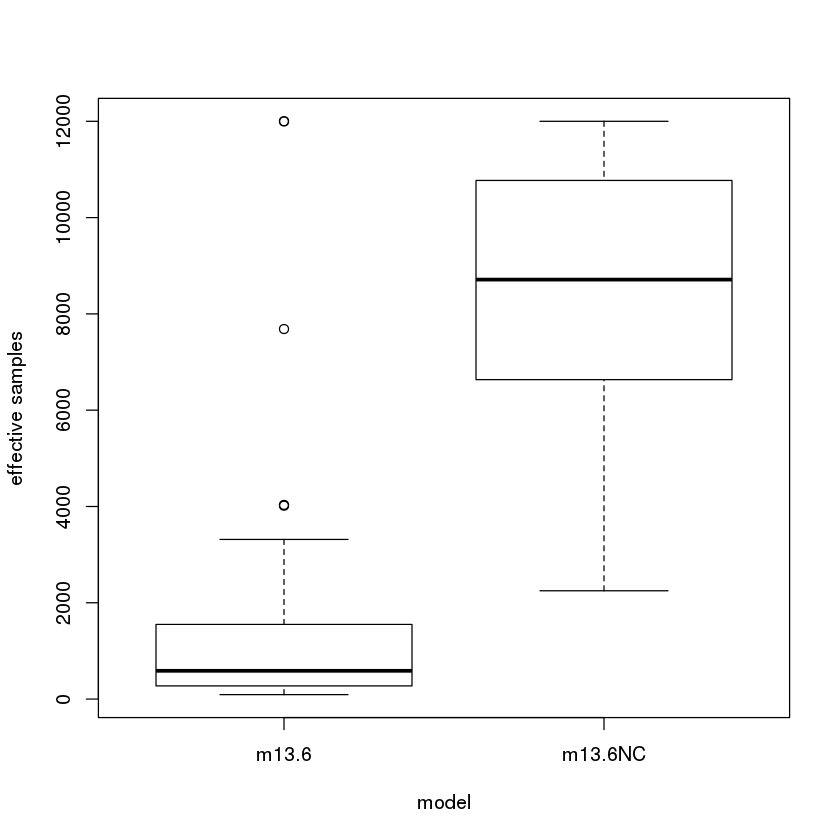

In [24]:
## R code 13.24
# extract n_eff values for each model
neff_c <- precis(m13.6,2)@output$n_eff
neff_nc <- precis(m13.6NC,2)@output$n_eff
# plot distributions
boxplot( list( 'm13.6'=neff_c , 'm13.6NC'=neff_nc ) ,
    ylab="effective samples" , xlab="model" )

In [25]:
## R code 13.25
precis( m13.6NC , depth=2 , pars=c("sigma_actor","sigma_block") )

Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

               Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
sigma_actor[1] 2.35   0.89       1.15       3.51  3573    1
sigma_actor[2] 0.46   0.36       0.00       0.89  5705    1
sigma_actor[3] 0.53   0.49       0.00       1.09  5353    1
sigma_block[1] 0.22   0.20       0.00       0.46  5865    1
sigma_block[2] 0.57   0.40       0.00       1.06  3795    1
sigma_block[3] 0.53   0.43       0.00       1.05  5053    1

In [26]:
## R code 13.26
p <- link(m13.6NC)
str(p)

[ 1000 / 1000 ]
List of 4
 $ p  : num [1:1000, 1:504] 0.297 0.361 0.25 0.303 0.223 ...
 $ A  : num [1:1000, 1:504] -0.861 -0.569 -1.099 -0.832 -1.25 ...
 $ BP : num [1:1000, 1:504] 0.0609 1.176 1.0384 0.5088 1.1527 ...
 $ BPC: num [1:1000, 1:504] 0.7057 -0.4561 0.0777 0.6392 -0.7825 ...


In [27]:
## R code 13.27
compare( m13.6NC , m12.5 )

ERROR: Error in compare(m13.6NC, m12.5): object 'm12.5' not found


In [28]:
## R code 13.28
m13.6nc1 <- map2stan(
    alist(
        pulled_left ~ dbinom(1,p),

        # linear models
        logit(p) <- A + (BP + BPC*condition)*prosoc_left,
        A <- a + za_actor[actor]*sigma_actor[1] +
                 za_block[block_id]*sigma_block[1],
        BP <- bp + zbp_actor[actor]*sigma_actor[2] +
                   zbp_block[block_id]*sigma_block[2],
        BPC <- bpc + zbpc_actor[actor]*sigma_actor[3] +
                     zbpc_block[block_id]*sigma_block[3],

        # adaptive priors
        c(za_actor,zbp_actor,zbpc_actor)[actor] ~ dmvnorm(0,Rho_actor),
        c(za_block,zbp_block,zbpc_block)[block_id] ~ dmvnorm(0,Rho_block),

        # fixed priors
        c(a,bp,bpc) ~ dnorm(0,1),
        sigma_actor ~ dcauchy(0,2),
        sigma_block ~ dcauchy(0,2),
        Rho_actor ~ dlkjcorr(4),
        Rho_block ~ dlkjcorr(4)
    ) ,
    data=d ,
    start=list( sigma_actor=c(1,1,1), sigma_block=c(1,1,1) ),
    constraints=list( sigma_actor="lower=0", sigma_block="lower=0" ),
    types=list( Rho_actor="corr_matrix", Rho_block="corr_matrix" ),
    iter=5000 , warmup=1000 , chains=3 , cores=3 )


SAMPLING FOR MODEL 'pulled_left ~ dbinom(1, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.004877 seconds (Sampling)
#                0.00488 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 12000 / 12000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

In [29]:
## R code 13.29
# load the distance matrix
library(rethinking)
data(islandsDistMatrix)

# display short column names, so fits on screen
Dmat <- islandsDistMatrix
colnames(Dmat) <- c("Ml","Ti","SC","Ya","Fi","Tr","Ch","Mn","To","Ha")
round(Dmat,1)

,Ml,Ti,SC,Ya,Fi,Tr,Ch,Mn,To,Ha
Malekula,0.0,0.5,0.6,4.4,1.2,2.0,3.2,2.8,1.9,5.7
Tikopia,0.5,0.0,0.3,4.2,1.2,2.0,2.9,2.7,2.0,5.3
Santa Cruz,0.6,0.3,0.0,3.9,1.6,1.7,2.6,2.4,2.3,5.4
Yap,4.4,4.2,3.9,0.0,5.4,2.5,1.6,1.6,6.1,7.2
Lau Fiji,1.2,1.2,1.6,5.4,0.0,3.2,4.0,3.9,0.8,4.9
Trobriand,2.0,2.0,1.7,2.5,3.2,0.0,1.8,0.8,3.9,6.7
Chuuk,3.2,2.9,2.6,1.6,4.0,1.8,0.0,1.2,4.8,5.8
Manus,2.8,2.7,2.4,1.6,3.9,0.8,1.2,0.0,4.6,6.7
Tonga,1.9,2.0,2.3,6.1,0.8,3.9,4.8,4.6,0.0,5.0
Hawaii,5.7,5.3,5.4,7.2,4.9,6.7,5.8,6.7,5.0,0.0


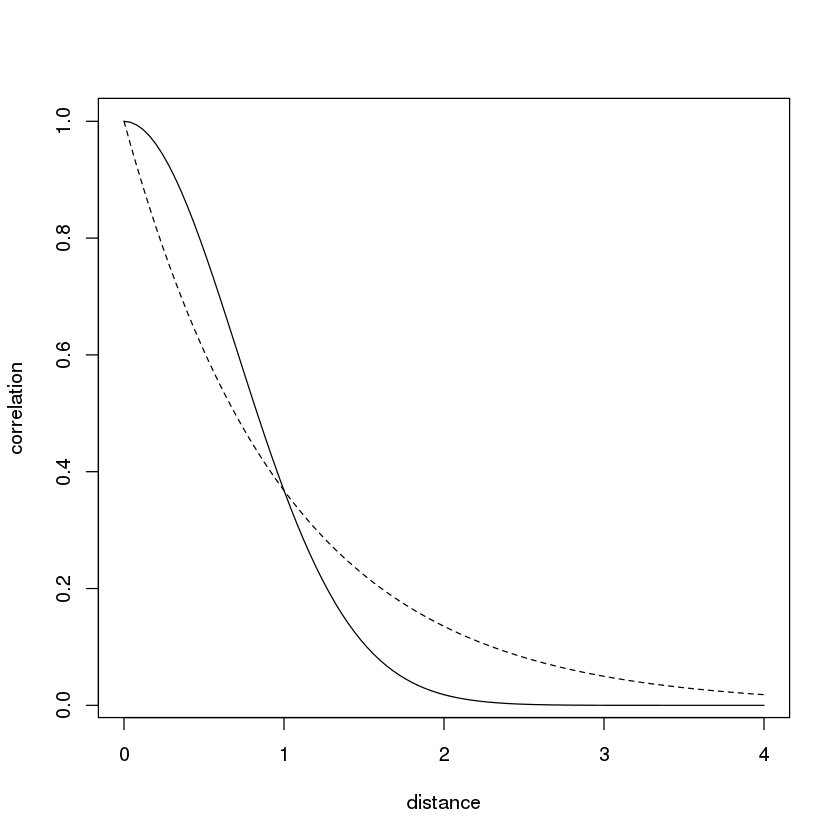

In [30]:
## R code 13.30
# linear
curve( exp(-1*x) , from=0 , to=4 , lty=2 ,
    xlab="distance" , ylab="correlation" )

# squared
curve( exp(-1*x^2) , add=TRUE )

In [31]:
## R code 13.31
data(Kline2) # load the ordinary data, now with coordinates
d <- Kline2
d$society <- 1:10 # index observations

m13.7 <- map2stan(
    alist(
        total_tools ~ dpois(lambda),
        log(lambda) <- a + g[society] + bp*logpop,
        g[society] ~ GPL2( Dmat , etasq , rhosq , 0.01 ),
        a ~ dnorm(0,10),
        bp ~ dnorm(0,1),
        etasq ~ dcauchy(0,1),
        rhosq ~ dcauchy(0,1)
    ),
    data=list(
        total_tools=d$total_tools,
        logpop=d$logpop,
        society=d$society,
        Dmat=islandsDistMatrix),
    warmup=2000 , iter=1e4 , chains=4 )


SAMPLING FOR MODEL 'total_tools ~ dpois(lambda)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1, Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1, Iteration: 2001 / 10000 [ 20%]  (Sampling)
Chain 1, Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1, Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1, Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1, Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1, Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1, Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1, Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1, Iteration: 10000 / 10000 [100%]  (Sampling)# 
#  Elapsed Time: 48.0865 seconds (Warm-up)
#                145.795 seconds (Sampling)
#                193.882 seconds (Total)
# 

SAMPLING FOR MODEL 'total_tools ~ dpois(lambda)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 2, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 2, Iterati

Computing WAIC
Constructing posterior predictions


[ 32000 / 32000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

In [32]:
## R code 13.32
precis(m13.7,depth=2)

Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

       Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
g[1]  -0.27   0.47      -1.02       0.38  2546    1
g[2]  -0.13   0.45      -0.80       0.57  2451    1
g[3]  -0.17   0.44      -0.82       0.48  2409    1
g[4]   0.29   0.39      -0.29       0.86  2457    1
g[5]   0.02   0.39      -0.55       0.58  2433    1
g[6]  -0.46   0.40      -1.05       0.09  2534    1
g[7]   0.09   0.38      -0.46       0.64  2506    1
g[8]  -0.27   0.39      -0.84       0.27  2504    1
g[9]   0.23   0.36      -0.31       0.74  2547    1
g[10] -0.13   0.47      -0.87       0.56  4180    1
a      1.30   1.20      -0.54       3.23  3635    1
bp     0.25   0.12       0.06       0.43  5195    1
etasq  0.36   0.72       0.01       0.73  3576    1
rhosq  1.67  15.49       0.00       2.06  7649    1

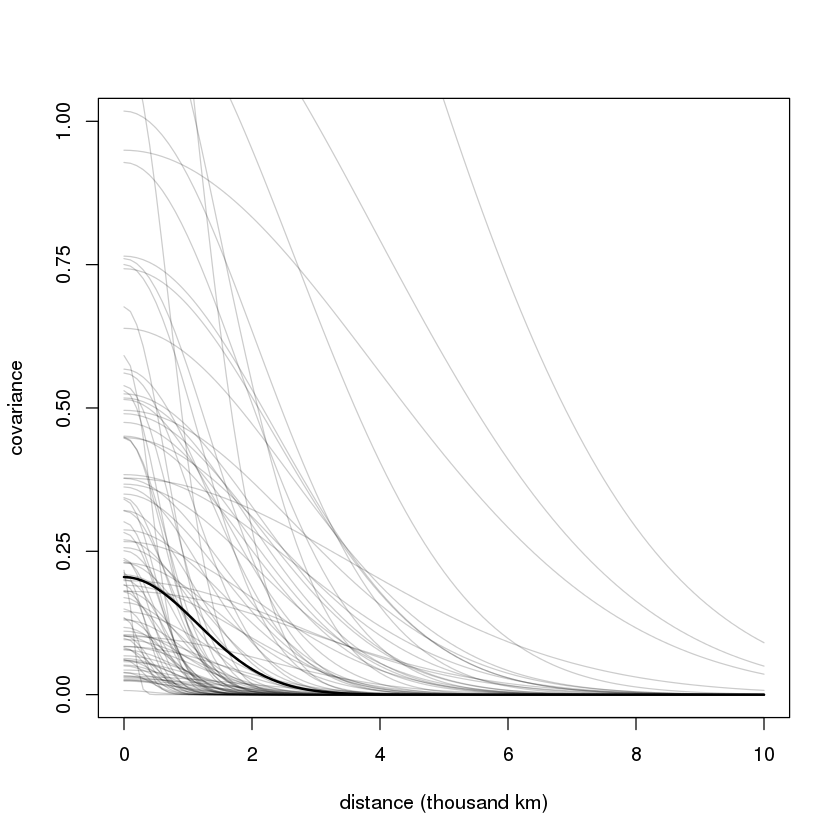

In [33]:
## R code 13.33
post <- extract.samples(m13.7)

# plot the posterior median covariance function
curve( median(post$etasq)*exp(-median(post$rhosq)*x^2) , from=0 , to=10 ,
    xlab="distance (thousand km)" , ylab="covariance" , ylim=c(0,1) ,
    yaxp=c(0,1,4) , lwd=2 )

# plot 100 functions sampled from posterior
for ( i in 1:100 )
    curve( post$etasq[i]*exp(-post$rhosq[i]*x^2) , add=TRUE ,
        col=col.alpha("black",0.2) )

In [34]:
## R code 13.34
# compute posterior median covariance among societies
K <- matrix(0,nrow=10,ncol=10)
for ( i in 1:10 )
    for ( j in 1:10 )
        K[i,j] <- median(post$etasq) *
                  exp( -median(post$rhosq) * islandsDistMatrix[i,j]^2 )
diag(K) <- median(post$etasq) + 0.01

In [35]:
## R code 13.35
# convert to correlation matrix
Rho <- round( cov2cor(K) , 2 )
# add row/col names for convenience
colnames(Rho) <- c("Ml","Ti","SC","Ya","Fi","Tr","Ch","Mn","To","Ha")
rownames(Rho) <- colnames(Rho)
Rho

,Ml,Ti,SC,Ya,Fi,Tr,Ch,Mn,To,Ha
Ml,1.00,0.87,0.82,0.00,0.53,0.19,0.02,0.05,0.25,0.00
Ti,0.87,1.00,0.92,0.00,0.53,0.20,0.04,0.06,0.22,0.00
SC,0.82,0.92,1.00,0.00,0.38,0.31,0.07,0.11,0.13,0.00
Ya,0.00,0.00,0.00,1.00,0.00,0.09,0.38,0.35,0.00,0.00
Fi,0.53,0.53,0.38,0.00,1.00,0.02,0.00,0.00,0.76,0.00
Tr,0.19,0.20,0.31,0.09,0.02,1.00,0.27,0.72,0.00,0.00
Ch,0.02,0.04,0.07,0.38,0.00,0.27,1.00,0.54,0.00,0.00
Mn,0.05,0.06,0.11,0.35,0.00,0.72,0.54,1.00,0.00,0.00
To,0.25,0.22,0.13,0.00,0.76,0.00,0.00,0.00,1.00,0.00
Ha,0,0,0,0,0,0,0,0,0,1


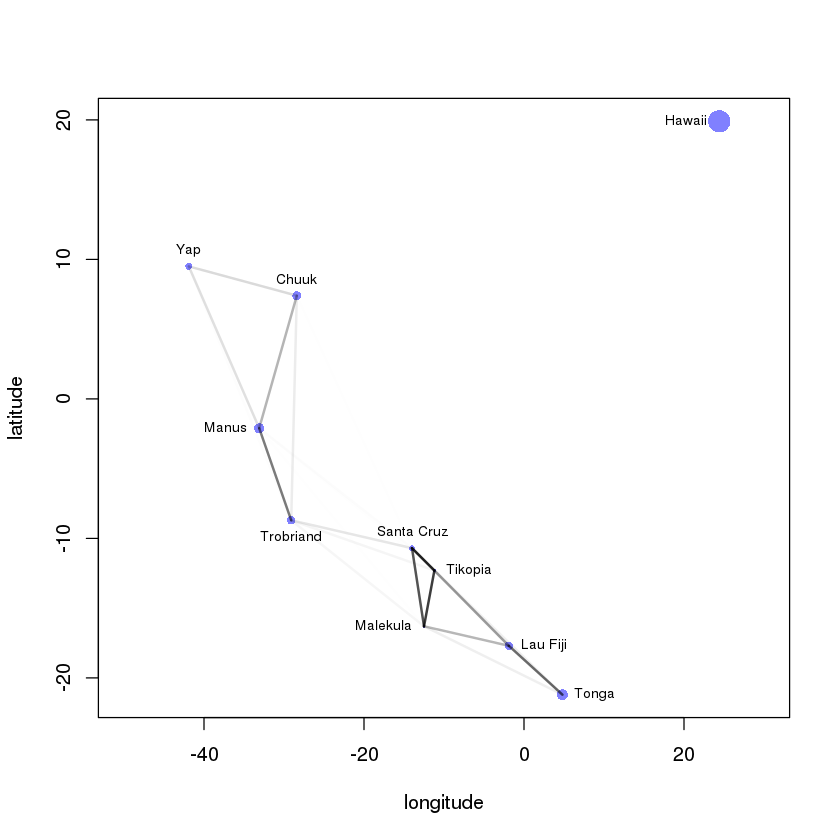

In [36]:
## R code 13.36
# scale point size to logpop
psize <- d$logpop / max(d$logpop)
psize <- exp(psize*1.5)-2

# plot raw data and labels
plot( d$lon2 , d$lat , xlab="longitude" , ylab="latitude" ,
    col=rangi2 , cex=psize , pch=16 , xlim=c(-50,30) )
labels <- as.character(d$culture)
text( d$lon2 , d$lat , labels=labels , cex=0.7 , pos=c(2,4,3,3,4,1,3,2,4,2) )

# overlay lines shaded by Rho
for( i in 1:10 )
    for ( j in 1:10 )
        if ( i < j )
            lines( c( d$lon2[i],d$lon2[j] ) , c( d$lat[i],d$lat[j] ) ,
                lwd=2 , col=col.alpha("black",Rho[i,j]^2) )

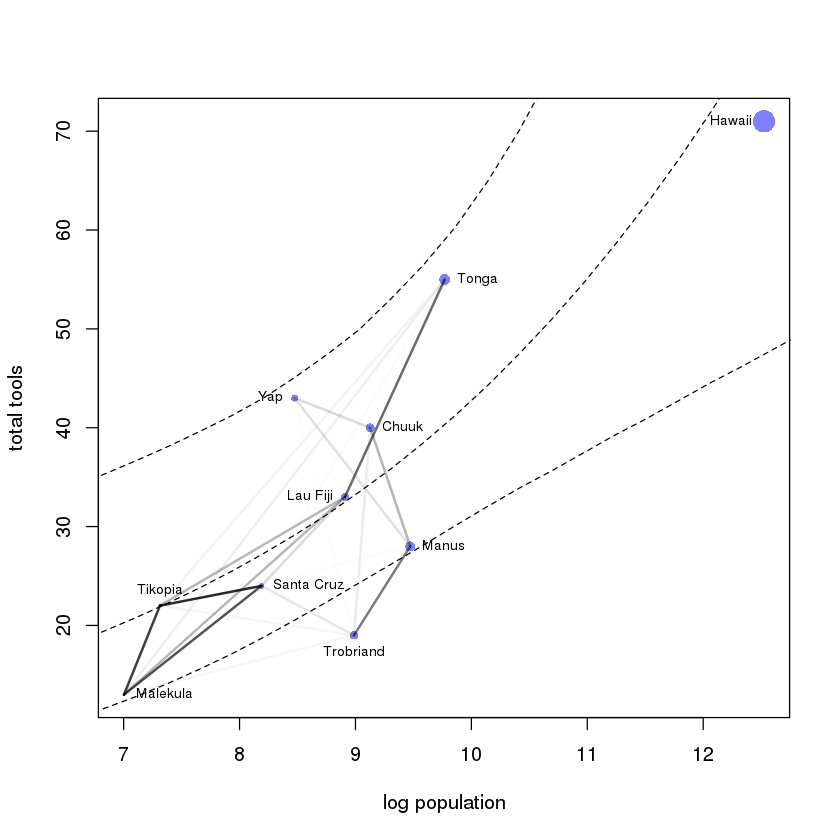

In [37]:
## R code 13.37
# compute posterior median relationship, ignoring distance
logpop.seq <- seq( from=6 , to=14 , length.out=30 )
lambda <- sapply( logpop.seq , function(lp) exp( post$a + post$bp*lp ) )
lambda.median <- apply( lambda , 2 , median )
lambda.PI80 <- apply( lambda , 2 , PI , prob=0.8 )

# plot raw data and labels
plot( d$logpop , d$total_tools , col=rangi2 , cex=psize , pch=16 ,
    xlab="log population" , ylab="total tools" )
text( d$logpop , d$total_tools , labels=labels , cex=0.7 ,
    pos=c(4,3,4,2,2,1,4,4,4,2) )

# display posterior predictions
lines( logpop.seq , lambda.median , lty=2 )
lines( logpop.seq , lambda.PI80[1,] , lty=2 )
lines( logpop.seq , lambda.PI80[2,] , lty=2 )

# overlay correlations
for( i in 1:10 )
    for ( j in 1:10 )
        if ( i < j )
            lines( c( d$logpop[i],d$logpop[j] ) ,
                   c( d$total_tools[i],d$total_tools[j] ) ,
                   lwd=2 , col=col.alpha("black",Rho[i,j]^2) )

In [38]:
## R code 13.38
S <- matrix( c( sa^2 , sa*sb*rho , sa*sb*rho , sb^2 ) , nrow=2 )

ERROR: Error in matrix(c(sa^2, sa * sb * rho, sa * sb * rho, sb^2), nrow = 2): object 'sa' not found
